Example 1:
Point 0: Angle = 75.96 degrees
Point 1: Angle = 90.00 degrees
Point 2: Angle = 108.43 degrees
Point 3: Angle = 85.60 degrees

Least rectangular point is at index 2 with an angle of 108.43 degrees.



/home/austin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


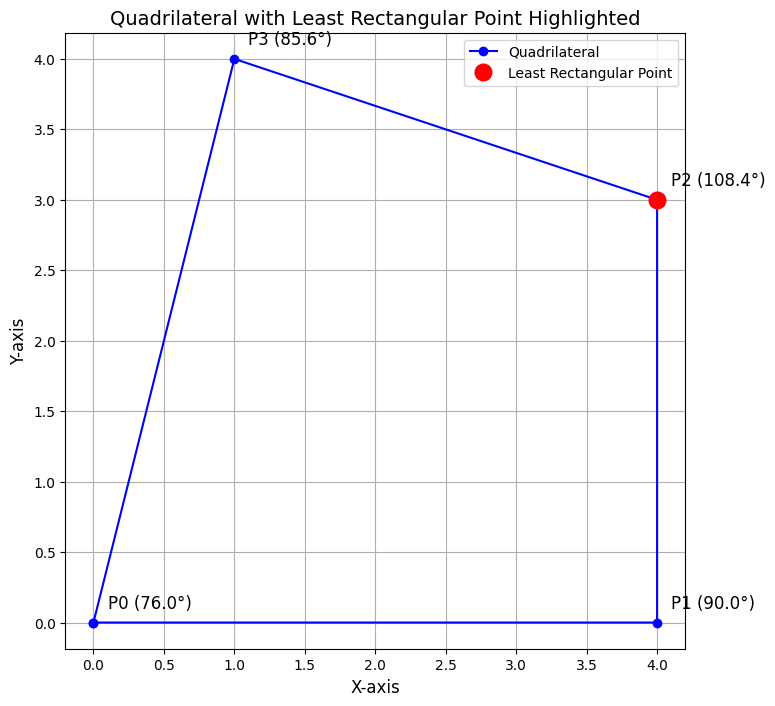


-------------------------

Example 2:
Point 0: Angle = 90.00 degrees
Point 1: Angle = 90.00 degrees
Point 2: Angle = 90.00 degrees
Point 3: Angle = 90.00 degrees

Least rectangular point is at index 0 with an angle of 90.00 degrees.



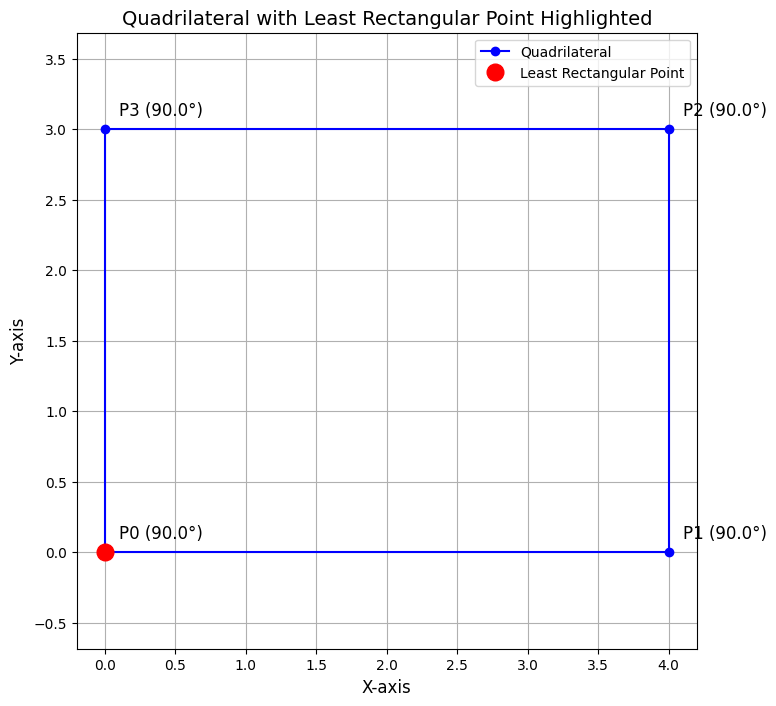


-------------------------

Example 3:
Point 0: Angle = 71.57 degrees
Point 1: Angle = 63.43 degrees
Point 2: Angle = 135.00 degrees
Point 3: Angle = 90.00 degrees

Least rectangular point is at index 2 with an angle of 135.00 degrees.



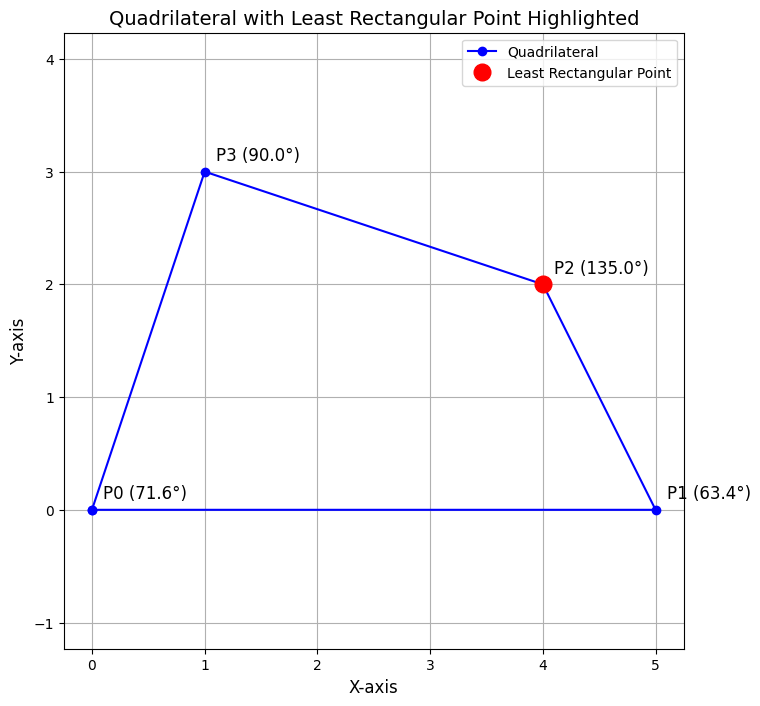

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def find_least_rectangular_point(points):
    """
    Finds the point in a set of four 2D points that forms the internal angle
    farthest from 90 degrees.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).

    Returns:
    - index: The index of the least rectangular point.
    - angle: The internal angle at that point in degrees.
    - angles: A list of all internal angles in degrees.
    """
    if points.shape != (4, 2):
        raise ValueError("Input must be a 4x2 NumPy array.")

    angles = []
    
    for i in range(4):
        # Current point
        Pi = points[i]
        
        # Previous and next points (with wrap-around)
        P_prev = points[i - 1]
        P_next = points[(i + 1) % 4]
        
        # Vectors
        v1 = P_prev - Pi
        v2 = P_next - Pi
        
        # Compute the angle between v1 and v2
        dot_prod = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        
        # Avoid division by zero
        if norm_v1 == 0 or norm_v2 == 0:
            angle = 0
        else:
            # Clamp the cosine value to the valid range [-1, 1] to avoid numerical issues
            cos_theta = np.clip(dot_prod / (norm_v1 * norm_v2), -1.0, 1.0)
            angle_rad = np.arccos(cos_theta)
            angle = np.degrees(angle_rad)
        
        angles.append(angle)
        print(f"Point {i}: Angle = {angle:.2f} degrees")

    angles = np.array(angles)
    
    # Compute absolute difference from 90 degrees
    diff = np.abs(angles - 90)
    
    # Find the index with the maximum difference
    least_rect_idx = np.argmax(diff)
    least_rect_angle = angles[least_rect_idx]
    
    print(f"\nLeast rectangular point is at index {least_rect_idx} with an angle of {least_rect_angle:.2f} degrees.\n")
    
    return least_rect_idx, least_rect_angle, angles

def plot_quadrilateral(points, least_rect_idx, angles):
    """
    Plots the quadrilateral defined by the points and highlights the least rectangular point.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).
    - least_rect_idx: The index of the least rectangular point.
    - angles: A list or array of internal angles at each point.
    """
    plt.figure(figsize=(8, 8))
    x, y = points[:,0], points[:,1]
    
    # Close the quadrilateral by adding the first point at the end
    plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'bo-', label='Quadrilateral')
    
    # Highlight the least rectangular point
    plt.plot(x[least_rect_idx], y[least_rect_idx], 'ro', markersize=12, label='Least Rectangular Point')
    
    # Annotate all points with their indices and angles
    for i in range(4):
        plt.text(x[i] + 0.1, y[i] + 0.1, f"P{i} ({angles[i]:.1f}°)", fontsize=12)
    
    plt.title('Quadrilateral with Least Rectangular Point Highlighted', fontsize=14)
    plt.xlabel('X-axis', fontsize=12)
    plt.ylabel('Y-axis', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Ensure equal scaling on both axes
    plt.show()

def find_and_plot_least_rectangular_point(points, plot=True):
    """
    Finds the least rectangular point and optionally plots the quadrilateral.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).
    - plot: Boolean indicating whether to plot the quadrilateral.

    Returns:
    - index: The index of the least rectangular point.
    - angle: The internal angle at that point in degrees.
    """
    least_rect_idx, least_rect_angle, angles = find_least_rectangular_point(points)
    
    if plot:
        plot_quadrilateral(points, least_rect_idx, angles)
    
    return least_rect_idx, least_rect_angle

# Example Usages with Plots
if __name__ == "__main__":
    # Example 1: Almost rectangle with one angle deviating
    points1 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [1, 4]  # This point deviates to make one angle >90
    ])
    
    print("Example 1:")
    find_and_plot_least_rectangular_point(points1)
    
    print("\n-------------------------\n")
    
    # Example 2: Perfect rectangle
    points2 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [0, 3]
    ])
    
    print("Example 2:")
    find_and_plot_least_rectangular_point(points2)
    
    print("\n-------------------------\n")
    
    # Example 3: Quadrilateral with one acute angle
    points3 = np.array([
        [0, 0],
        [5, 0],
        [4, 2],
        [1, 3]
    ])
    
    print("Example 3:")
    find_and_plot_least_rectangular_point(points3)


Example 1:
Point 0: Angle = 1.97 degrees
Point 1: Angle = 90.00 degrees
Point 2: Angle = 20.77 degrees
Point 3: Angle = 112.75 degrees

Least rectangular point is at index 3 with an angle of 112.75 degrees.



/home/austin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


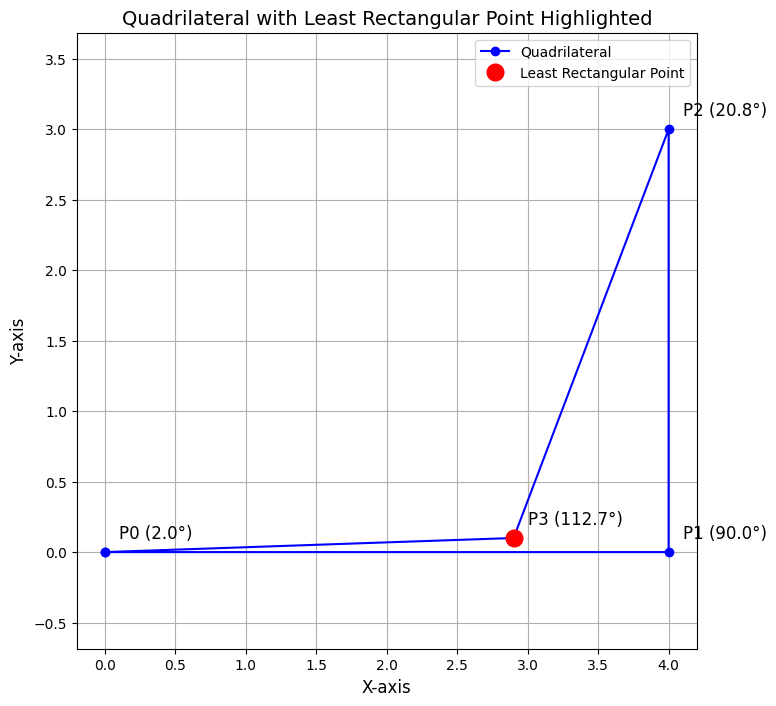


-------------------------

Example 2:
Point 0: Angle = 90.00 degrees
Point 1: Angle = 90.00 degrees
Point 2: Angle = 90.00 degrees
Point 3: Angle = 90.00 degrees

Least rectangular point is at index 0 with an angle of 90.00 degrees.



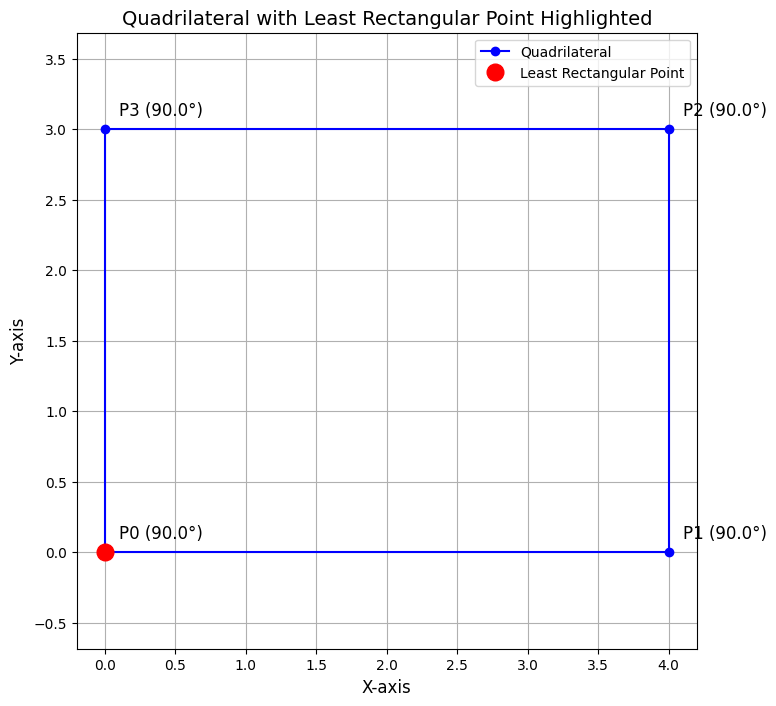


-------------------------

Example 3:
Point 0: Angle = 0.96 degrees
Point 1: Angle = 63.43 degrees
Point 2: Angle = 53.95 degrees
Point 3: Angle = 118.34 degrees

Least rectangular point is at index 3 with an angle of 118.34 degrees.



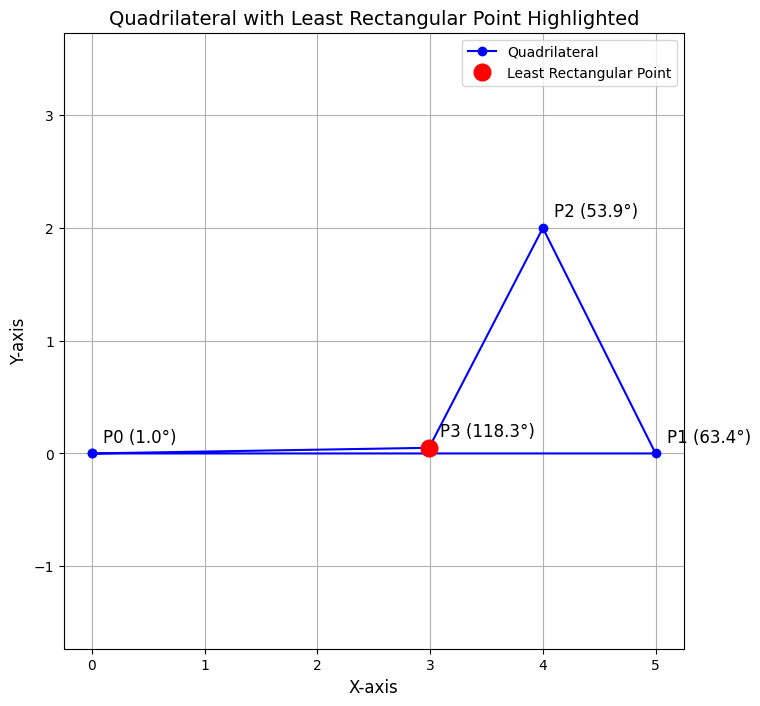

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_internal_angles(points):
    """
    Calculates the internal angles at each point of a quadrilateral.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).

    Returns:
    - angles: A NumPy array containing internal angles at each point in degrees.
    """
    if points.shape != (4, 2):
        raise ValueError("Input must be a 4x2 NumPy array.")

    angles = []

    for i in range(4):
        # Current point
        Pi = points[i]

        # Previous and next points (with wrap-around)
        P_prev = points[i - 1]
        P_next = points[(i + 1) % 4]

        # Vectors
        v1 = P_prev - Pi
        v2 = P_next - Pi

        # Compute the angle between v1 and v2
        dot_prod = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)

        # Avoid division by zero
        if norm_v1 == 0 or norm_v2 == 0:
            angle = 0
        else:
            # Clamp the cosine value to the valid range [-1, 1] to avoid numerical issues
            cos_theta = np.clip(dot_prod / (norm_v1 * norm_v2), -1.0, 1.0)
            angle_rad = np.arccos(cos_theta)
            angle = np.degrees(angle_rad)

        angles.append(angle)
        print(f"Point {i}: Angle = {angle:.2f} degrees")

    return np.array(angles)

def find_least_rectangular_point(points):
    """
    Identifies the point in a set of four 2D points that makes the shape more like a triangle.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).

    Returns:
    - least_rect_idx: The index of the least rectangular point.
    - least_rect_angle: The internal angle at that point in degrees.
    - angles: A NumPy array of all internal angles in degrees.
    """
    angles = calculate_internal_angles(points)

    # Compute absolute difference from 180 degrees
    diff_from_180 = np.abs(angles - 180)

    # Find the index with the smallest difference
    least_rect_idx = np.argmin(diff_from_180)
    least_rect_angle = angles[least_rect_idx]

    print(f"\nLeast rectangular point is at index {least_rect_idx} with an angle of {least_rect_angle:.2f} degrees.\n")

    return least_rect_idx, least_rect_angle, angles

def plot_quadrilateral(points, least_rect_idx, angles):
    """
    Plots the quadrilateral and highlights the least rectangular point.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).
    - least_rect_idx: The index of the least rectangular point.
    - angles: A NumPy array of internal angles at each point in degrees.
    """
    plt.figure(figsize=(8, 8))
    x, y = points[:, 0], points[:, 1]

    # Close the quadrilateral by adding the first point at the end
    plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'bo-', label='Quadrilateral')

    # Highlight the least rectangular point
    plt.plot(x[least_rect_idx], y[least_rect_idx], 'ro', markersize=12, label='Least Rectangular Point')

    # Annotate all points with their indices and angles
    for i in range(4):
        plt.text(x[i] + 0.1, y[i] + 0.1, f"P{i} ({angles[i]:.1f}°)", fontsize=12)

    plt.title('Quadrilateral with Least Rectangular Point Highlighted', fontsize=14)
    plt.xlabel('X-axis', fontsize=12)
    plt.ylabel('Y-axis', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Ensure equal scaling on both axes
    plt.show()

def find_and_plot_least_rectangular_point(points):
    """
    Finds the least rectangular point and plots the quadrilateral.

    Parameters:
    - points: A (4, 2) NumPy array where each row represents a point (x, y).

    Returns:
    - least_rect_idx: The index of the least rectangular point.
    - least_rect_angle: The internal angle at that point in degrees.
    """
    least_rect_idx, least_rect_angle, angles = find_least_rectangular_point(points)
    plot_quadrilateral(points, least_rect_idx, angles)
    return least_rect_idx, least_rect_angle

# Example Usages with Plots
if __name__ == "__main__":
    # Example 1: Quadrilateral with one point nearly colinear (making it almost a triangle)
    points1 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [2.9, 0.1]  # This point is nearly on the line between P0 and P1
    ])

    print("Example 1:")
    find_and_plot_least_rectangular_point(points1)

    print("\n-------------------------\n")

    # Example 2: Perfect rectangle (all angles 90 degrees)
    points2 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [0, 3]
    ])

    print("Example 2:")
    find_and_plot_least_rectangular_point(points2)

    print("\n-------------------------\n")

    # Example 3: Quadrilateral with one point making an acute angle (~170 degrees)
    points3 = np.array([
        [0, 0],
        [5, 0],
        [4, 2],
        [2.99, 0.05]  # This point is nearly on the line between P0 and P1
    ])

    print("Example 3:")
    find_and_plot_least_rectangular_point(points3)


Example 1:


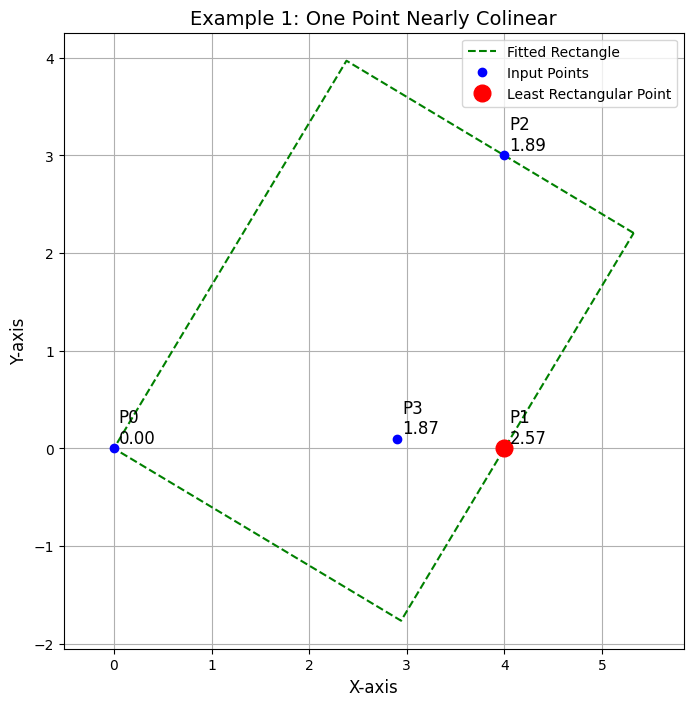

Least rectangular point is P1 with a distance of 2.57 units from the fitted rectangle.

Example 2:


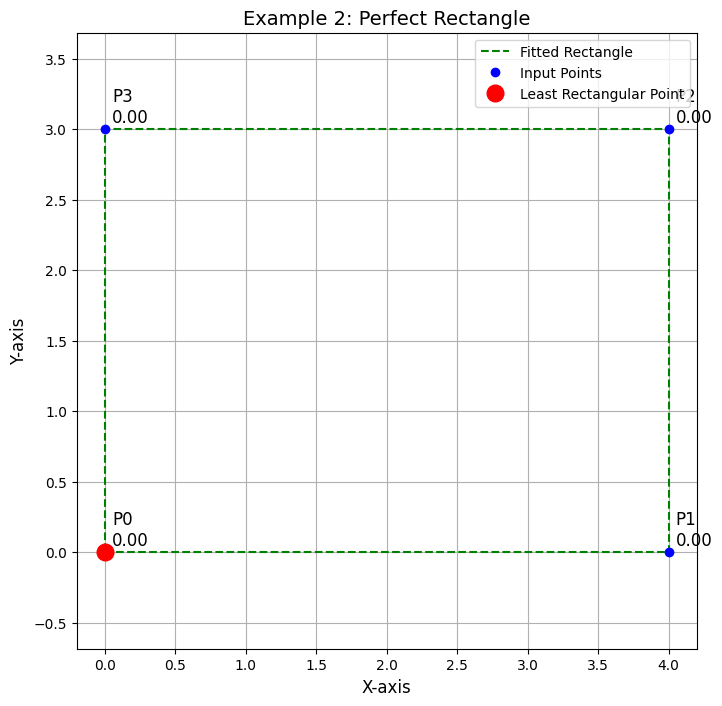

Least rectangular point is P0 with a distance of 0.00 units from the fitted rectangle.

Example 3:


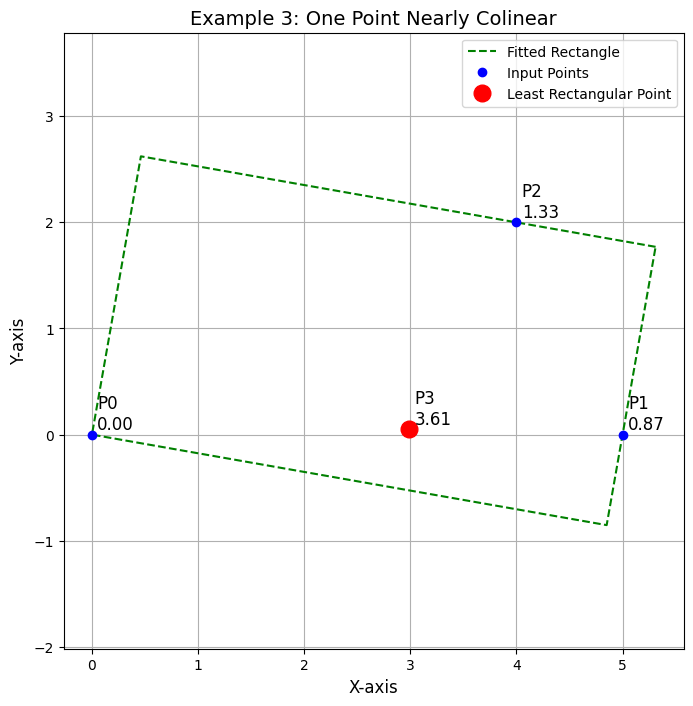

Least rectangular point is P3 with a distance of 3.61 units from the fitted rectangle.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

def perform_pca(points):
    """
    Performs Principal Component Analysis on the given points.

    Parameters:
    - points: A (4, 2) NumPy array of 2D points.

    Returns:
    - mean: The mean of the points.
    - components: The principal components (eigenvectors).
    """
    mean = np.mean(points, axis=0)
    centered = points - mean
    cov = np.cov(centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Sort eigenvectors by descending eigenvalues
    order = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:, order]
    return mean, eigenvectors

def rotate_points(points, angle_rad):
    """
    Rotates points by the given angle in radians.

    Parameters:
    - points: A (N, 2) NumPy array of points.
    - angle_rad: Rotation angle in radians.

    Returns:
    - rotated: Rotated points as a (N, 2) NumPy array.
    """
    rotation_matrix = np.array([
        [np.cos(angle_rad), np.sin(angle_rad)],
        [-np.sin(angle_rad), np.cos(angle_rad)]
    ])
    rotated = points @ rotation_matrix
    return rotated

def get_oriented_bounding_rectangle(points):
    """
    Fits an oriented bounding rectangle to the given points using PCA.

    Parameters:
    - points: A (4, 2) NumPy array of 2D points.

    Returns:
    - rectangle: A (4, 2) NumPy array of rectangle corners.
    """
    mean, components = perform_pca(points)
    # Determine rotation angle to align with principal components
    angle_rad = np.arctan2(components[1, 0], components[0, 0])
    # Rotate points to align with principal axes
    rotated = rotate_points(points - mean, angle_rad)
    # Find min and max in rotated space
    min_x, min_y = np.min(rotated, axis=0)
    max_x, max_y = np.max(rotated, axis=0)
    # Define rectangle corners in rotated space
    rect_rotated = np.array([
        [min_x, min_y],
        [max_x, min_y],
        [max_x, max_y],
        [min_x, max_y]
    ])
    # Rotate rectangle corners back to original orientation
    rotated_back = rotate_points(rect_rotated, -angle_rad) + mean
    return rotated_back

def assign_points_to_corners(points, rectangle):
    """
    Assigns each point to the nearest rectangle corner.

    Parameters:
    - points: A (4, 2) NumPy array of input points.
    - rectangle: A (4, 2) NumPy array of rectangle corners.

    Returns:
    - assignments: A list where assignments[i] is the index of the rectangle corner assigned to point i.
    """
    # Compute distance matrix
    distance_matrix = np.linalg.norm(points[:, np.newaxis, :] - rectangle[np.newaxis, :, :], axis=2)
    # Find the optimal assignment minimizing total distance
    # Since there are only 4 points, we can check all permutations
    min_total_distance = np.inf
    best_assignment = None
    for perm in permutations(range(4)):
        total_distance = sum(distance_matrix[i, perm[i]] for i in range(4))
        if total_distance < min_total_distance:
            min_total_distance = total_distance
            best_assignment = perm
    return best_assignment

def find_least_rectangular_point(points):
    """
    Identifies the least rectangular point by fitting a rectangle and finding the outlier.

    Parameters:
    - points: A (4, 2) NumPy array of 2D points.

    Returns:
    - least_rect_idx: The index of the least rectangular point.
    - least_rect_distance: The distance of the outlier point from the rectangle.
    - rectangle: The fitted rectangle as a (4, 2) NumPy array.
    - assignments: List of rectangle corner indices assigned to each point.
    - distances: List of distances of each point to its assigned rectangle corner.
    """
    rectangle = get_oriented_bounding_rectangle(points)
    assignments = assign_points_to_corners(points, rectangle)
    distances = [np.linalg.norm(points[i] - rectangle[assignments[i]]) for i in range(4)]
    least_rect_idx = np.argmax(distances)
    least_rect_distance = distances[least_rect_idx]
    return least_rect_idx, least_rect_distance, rectangle, assignments, distances

def plot_results(points, rectangle, least_rect_idx, assignments, distances, title=""):
    """
    Plots the points, the fitted rectangle, and highlights the least rectangular point.

    Parameters:
    - points: A (4, 2) NumPy array of input points.
    - rectangle: A (4, 2) NumPy array of rectangle corners.
    - least_rect_idx: Index of the least rectangular point.
    - assignments: List of rectangle corner indices assigned to each point.
    - distances: List of distances of each point to its assigned rectangle corner.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 8))
    
    # Plot the fitted rectangle
    rect_closed = np.vstack([rectangle, rectangle[0]])  # Close the rectangle
    plt.plot(rect_closed[:,0], rect_closed[:,1], 'g--', label='Fitted Rectangle')
    
    # Plot input points
    plt.plot(points[:,0], points[:,1], 'bo', label='Input Points')
    
    # Highlight the least rectangular point
    plt.plot(points[least_rect_idx,0], points[least_rect_idx,1], 'ro', markersize=12, label='Least Rectangular Point')
    
    # Annotate points
    for i in range(4):
        plt.text(points[i,0] + 0.05, points[i,1] + 0.05, f"P{i}\n{distances[i]:.2f}", fontsize=12)
    
    plt.title(title, fontsize=14)
    plt.xlabel('X-axis', fontsize=12)
    plt.ylabel('Y-axis', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def find_and_plot_least_rectangular_point(points, title=""):
    """
    Finds the least rectangular point and plots the results.

    Parameters:
    - points: A (4, 2) NumPy array of input points.
    - title: Title of the plot.

    Returns:
    - least_rect_idx: Index of the least rectangular point.
    - least_rect_distance: Distance of the outlier point from the rectangle.
    - rectangle: The fitted rectangle as a (4, 2) NumPy array.
    """
    least_rect_idx, least_rect_distance, rectangle, assignments, distances = find_least_rectangular_point(points)
    plot_results(points, rectangle, least_rect_idx, assignments, distances, title=title)
    return least_rect_idx, least_rect_distance

# Example Usage
if __name__ == "__main__":
    # Example 1: Quadrilateral with one point nearly colinear (making it almost a triangle)
    points1 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [2.9, 0.1]  # This point is nearly on the line between P0 and P1
    ])
    
    print("Example 1:")
    idx1, dist1 = find_and_plot_least_rectangular_point(points1, title="Example 1: One Point Nearly Colinear")
    print(f"Least rectangular point is P{idx1} with a distance of {dist1:.2f} units from the fitted rectangle.\n")
    
    # Example 2: Perfect rectangle (all angles 90 degrees)
    points2 = np.array([
        [0, 0],
        [4, 0],
        [4, 3],
        [0, 3]
    ])
    
    print("Example 2:")
    idx2, dist2 = find_and_plot_least_rectangular_point(points2, title="Example 2: Perfect Rectangle")
    print(f"Least rectangular point is P{idx2} with a distance of {dist2:.2f} units from the fitted rectangle.\n")
    
    # Example 3: Quadrilateral with one point making an acute angle (~170 degrees)
    points3 = np.array([
        [0, 0],
        [5, 0],
        [4, 2],
        [2.99, 0.05]  # This point is nearly on the line between P0 and P1
    ])
    
    print("Example 3:")
    idx3, dist3 = find_and_plot_least_rectangular_point(points3, title="Example 3: One Point Nearly Colinear")
    print(f"Least rectangular point is P{idx3} with a distance of {dist3:.2f} units from the fitted rectangle.\n")
